In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
DATA_DIR = "../../data/"
DATA_NAME = "abali.xlsx"

# Load data
df = pd.read_excel(os.path.join(DATA_DIR, DATA_NAME))

In [3]:
df.head()

,WMOCode,StationName,VendorName,StationTypeName,DateTimes,ShamsiDateTime,Air Pressure(hPa),Air Temperature(C),Radiation(w/m2),Rain Sum(mm),...,Soil Temperature 100cm(C),Soil Temperature 10cm(C),Soil Temperature 20cm(C),Soil Temperature 30cm(C),Soil Temperature 50cm(C),Soil Temperature 5cm(C),Surface Temperature(C),Total Radiation(w/m2),Wind Direction(D),Wind Speed(m/s)
0,40755,آبعلي,Vaisala,SYNOPTIC,2025-03-10 23:50:10,1403/12/20 23:50:10,757.9,0.9,67.0,NaN,...,2.0,-0.4,-0.4,-0.5,0.2,-0.2,-0.3,1414.3,230.0,0.0
1,40755,آبعلي,Vaisala,SYNOPTIC,2025-03-10 23:40:10,1403/12/20 23:40:10,758.0,1.0,67.0,NaN,...,2.0,-0.4,-0.4,-0.5,0.2,-0.3,-0.3,1374.3,193.0,0.0
2,40755,آبعلي,Vaisala,SYNOPTIC,2025-03-10 23:30:10,1403/12/20 23:30:10,757.9,1.1,67.0,NaN,...,2.0,-0.4,-0.4,-0.5,0.2,-0.3,-0.4,1334.3,213.0,1.0
3,40755,آبعلي,Vaisala,SYNOPTIC,2025-03-10 23:20:10,1403/12/20 23:20:10,757.9,1.1,68.0,NaN,...,2.0,-0.4,-0.4,-0.5,0.2,-0.3,-0.4,1293.9,244.0,1.5
4,40755,آبعلي,Vaisala,SYNOPTIC,2025-03-10 23:10:10,1403/12/20 23:10:10,758.0,1.2,67.0,NaN,...,2.0,-0.4,-0.4,-0.5,0.2,-0.3,-0.4,1253.0,258.0,0.1


In [4]:
df.columns

Index(['WMOCode', 'StationName', 'VendorName', 'StationTypeName', 'DateTimes',
       'ShamsiDateTime', 'Air Pressure(hPa)', 'Air Temperature(C)',
       'Radiation(w/m2)', 'Rain Sum(mm)', 'rel. Humidity(%)',
       'Soil Temperature 100cm(C)', 'Soil Temperature 10cm(C)',
       'Soil Temperature 20cm(C)', 'Soil Temperature 30cm(C)',
       'Soil Temperature 50cm(C)', 'Soil Temperature 5cm(C)',
       'Surface Temperature(C)', 'Total Radiation(w/m2)', 'Wind Direction(D)',
       'Wind Speed(m/s)'],
      dtype='object')

In [5]:
dirty_df = df[['DateTimes',
               'Air Pressure(hPa)',
               'Air Temperature(C)',
               'rel. Humidity(%)',
               'Wind Direction(D)',
               'Wind Speed(m/s)']]

In [6]:
dirty_df = dirty_df.rename(columns={
    'DateTimes': 'datetime',
    'Air Pressure(hPa)': 'pressure',
    'Air Temperature(C)': 'temperature',
    'rel. Humidity(%)': 'humidity',
    'Wind Direction(D)': 'wind_direction',
    'Wind Speed(m/s)': 'wind_speed'
})

In [7]:
dirty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61353 entries, 0 to 61352
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        61353 non-null  object 
 1   pressure        61350 non-null  float64
 2   temperature     61348 non-null  float64
 3   humidity        57540 non-null  float64
 4   wind_direction  61349 non-null  float64
 5   wind_speed      61348 non-null  float64
dtypes: float64(5), object(1)
memory usage: 2.8+ MB


In [8]:
dirty_df.head()

,datetime,pressure,temperature,humidity,wind_direction,wind_speed
0,2025-03-10 23:50:10,757.9,0.9,NaN,230.0,0.0
1,2025-03-10 23:40:10,758.0,1.0,NaN,193.0,0.0
2,2025-03-10 23:30:10,757.9,1.1,NaN,213.0,1.0
3,2025-03-10 23:20:10,757.9,1.1,NaN,244.0,1.5
4,2025-03-10 23:10:10,758.0,1.2,100.0,258.0,0.1


In [9]:
dirty_df.loc[:4, 'humidity'] = 100.0

In [10]:
dirty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61353 entries, 0 to 61352
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        61353 non-null  object 
 1   pressure        61350 non-null  float64
 2   temperature     61348 non-null  float64
 3   humidity        57544 non-null  float64
 4   wind_direction  61349 non-null  float64
 5   wind_speed      61348 non-null  float64
dtypes: float64(5), object(1)
memory usage: 2.8+ MB


In [11]:
dirty_df.tail()

,datetime,pressure,temperature,humidity,wind_direction,wind_speed
61348,2024-01-01 00:40:10,758.4,-0.8,60.0,339.0,0.0
61349,2024-01-01 00:30:10,758.4,-1.1,62.0,40.0,0.0
61350,2024-01-01 00:20:10,758.5,-0.6,60.0,21.0,0.0
61351,2024-01-01 00:10:10,758.5,-0.9,62.0,111.0,0.2
61352,2024-01-01 00:00:10,758.6,-1.6,68.0,6.0,0.3


In [12]:
# Copy the humidity column
humidity = dirty_df['humidity'].copy()

# Create a mask for NaNs that are between two 100s
mask = (
    humidity.isna() &            # It's a NaN
    (humidity.ffill() == 100.0) & # The previous non-NaN is 100
    (humidity.bfill() == 100.0)   # The next non-NaN is 100
)

# Fill only those NaNs with 100
dirty_df.loc[mask, 'humidity'] = 100.0


In [13]:
dirty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61353 entries, 0 to 61352
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        61353 non-null  object 
 1   pressure        61350 non-null  float64
 2   temperature     61348 non-null  float64
 3   humidity        60609 non-null  float64
 4   wind_direction  61349 non-null  float64
 5   wind_speed      61348 non-null  float64
dtypes: float64(5), object(1)
memory usage: 2.8+ MB


In [14]:
# Check for exact duplicate rows
print("Exact duplicate rows:", dirty_df.duplicated().sum())

# Check for duplicates based only on datetime (should be unique)
print("Duplicate datetime entries:", dirty_df.duplicated(subset=['datetime']).sum())

# Show duplicated datetime entries (if any)
duplicated_datetimes = dirty_df[dirty_df.duplicated(subset=['datetime'], keep=False)]
print("\nDuplicated datetime records (if any):")
print(duplicated_datetimes.sort_values('datetime').head(20))

# Check for near-duplicates in datetime (e.g., same minute)
dirty_df['datetime_rounded'] = pd.to_datetime(dirty_df['datetime']).dt.round('min')
print("\nRows with same rounded minute:", dirty_df.duplicated(subset=['datetime_rounded']).sum())

# Optional: inspect time gaps for irregular sampling
dirty_df_sorted = dirty_df.sort_values('datetime').copy()
dirty_df_sorted['time_diff'] = pd.to_datetime(dirty_df_sorted['datetime']).diff()
print("\nMost common time intervals:")
print(dirty_df_sorted['time_diff'].value_counts().head())

Exact duplicate rows: 0
Duplicate datetime entries: 0

Duplicated datetime records (if any):
Empty DataFrame
Columns: [datetime, pressure, temperature, humidity, wind_direction, wind_speed]
Index: []

Rows with same rounded minute: 0

Most common time intervals:
time_diff
0 days 00:10:00    59093
0 days 00:09:59      886
0 days 00:10:01      885
0 days 00:20:00      408
0 days 00:30:00       23
Name: count, dtype: int64


In [17]:
# Identify rows where humidity is still NaN after previous filling
hum_nan_mask = dirty_df['humidity'].isna()

# Show count of remaining NaNs
print("Remaining humidity NaNs:", hum_nan_mask.sum())

# Show first few rows with humidity NaN
print("\nFirst 10 rows with humidity NaN:")
dirty_df[hum_nan_mask].head(10)

# Check if remaining NaNs are at the start or end
print("\nNaNs in first 100 rows:", hum_nan_mask.iloc[:100].sum())
print("NaNs in last 100 rows:", hum_nan_mask.iloc[-100:].sum())

# Check time gaps around remaining NaNs (to see if part of long gaps)
if hum_nan_mask.sum() > 0:
    nan_df = dirty_df[hum_nan_mask].copy()
    print("\nSample datetime range of remaining NaNs:")
    print("Earliest:", nan_df['datetime'].min())
    print("Latest:", nan_df['datetime'].max())

Remaining humidity NaNs: 744

First 10 rows with humidity NaN:

NaNs in first 100 rows: 0
NaNs in last 100 rows: 0

Sample datetime range of remaining NaNs:
Earliest: 2024-01-06 08:20:10
Latest: 2025-02-13 04:30:10


In [18]:
dirty_df[hum_nan_mask].head(10)

,datetime,pressure,temperature,humidity,wind_direction,wind_speed,datetime_rounded
3712,2025-02-13 04:30:10,757.0,-4.1,NaN,251.0,0.1,2025-02-13 04:30:00
3713,2025-02-13 04:20:10,757.0,-4.0,NaN,231.0,0.0,2025-02-13 04:20:00
3714,2025-02-13 04:10:10,756.9,-4.2,NaN,199.0,0.0,2025-02-13 04:10:00
3715,2025-02-13 04:00:10,756.8,-4.9,NaN,232.0,0.0,2025-02-13 04:00:00
3716,2025-02-13 03:50:10,756.7,-5.2,NaN,258.0,0.3,2025-02-13 03:50:00
3717,2025-02-13 03:40:10,756.7,-5.7,NaN,219.0,1.7,2025-02-13 03:40:00
3718,2025-02-13 03:30:10,756.5,-5.6,NaN,246.0,1.5,2025-02-13 03:30:00
3719,2025-02-13 03:20:10,756.4,-5.5,NaN,251.0,0.8,2025-02-13 03:20:00
3720,2025-02-13 03:10:10,756.6,-5.6,NaN,255.0,0.6,2025-02-13 03:10:00
3721,2025-02-13 03:00:10,756.7,-5.5,NaN,243.0,0.7,2025-02-13 03:00:00


In [19]:
dirty_df.iloc[3700:3720]

,datetime,pressure,temperature,humidity,wind_direction,wind_speed,datetime_rounded
3700,2025-02-13 06:30:10,757.7,-4.4,100.0,248.0,0.6,2025-02-13 06:30:00
3701,2025-02-13 06:20:11,757.7,-4.0,100.0,244.0,1.8,2025-02-13 06:20:00
3702,2025-02-13 06:10:11,757.7,-3.0,100.0,249.0,2.3,2025-02-13 06:10:00
3703,2025-02-13 06:00:11,757.5,-1.6,98.0,256.0,1.4,2025-02-13 06:00:00
3704,2025-02-13 05:50:11,757.4,-1.4,100.0,222.0,0.0,2025-02-13 05:50:00
3705,2025-02-13 05:40:11,757.4,-1.9,100.0,198.0,0.0,2025-02-13 05:40:00
3706,2025-02-13 05:30:11,757.4,-2.2,100.0,215.0,0.0,2025-02-13 05:30:00
3707,2025-02-13 05:20:11,757.3,-2.5,100.0,222.0,0.0,2025-02-13 05:20:00
3708,2025-02-13 05:10:11,757.3,-2.8,100.0,205.0,0.0,2025-02-13 05:10:00
3709,2025-02-13 05:00:11,757.2,-3.2,100.0,247.0,0.0,2025-02-13 05:00:00


In [20]:
dirty_df['humidity'] = dirty_df['humidity'].fillna(100.0)

In [21]:
dirty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61353 entries, 0 to 61352
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          61353 non-null  object        
 1   pressure          61350 non-null  float64       
 2   temperature       61348 non-null  float64       
 3   humidity          61353 non-null  float64       
 4   wind_direction    61349 non-null  float64       
 5   wind_speed        61348 non-null  float64       
 6   datetime_rounded  61353 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 3.3+ MB


In [22]:
# Ensure datetime is in correct datetime type and sort
dirty_df['datetime'] = pd.to_datetime(dirty_df['datetime'])
dirty_df = dirty_df.sort_values('datetime').reset_index(drop=True)

# Set datetime as index for time-based interpolation
dirty_df = dirty_df.set_index('datetime')

# Drop the helper column used earlier
dirty_df = dirty_df.drop(columns=['datetime_rounded'], errors='ignore')

# Time-based interpolation for remaining NaNs in all numeric columns
dirty_df = dirty_df.interpolate(method='time')

# Optional: forward/backward fill any remaining edge NaNs
dirty_df = dirty_df.ffill().bfill()

In [23]:
dirty_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61353 entries, 2024-01-01 00:00:10 to 2025-03-10 23:50:10
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pressure        61353 non-null  float64
 1   temperature     61353 non-null  float64
 2   humidity        61353 non-null  float64
 3   wind_direction  61353 non-null  float64
 4   wind_speed      61353 non-null  float64
dtypes: float64(5)
memory usage: 2.8 MB


In [24]:
# 1. Ensure datetime index is sorted (already done, but safe to confirm)
assert dirty_df.index.is_monotonic_increasing, "Datetime index is not sorted!"

# 2. Calculate time differences between consecutive rows
time_diffs = dirty_df.index.to_series().diff()

# 3. Show unique time intervals and their frequencies
print("Most common time intervals:")
print(time_diffs.value_counts().head(10))

# 4. Check for unexpected gaps (e.g., > 15 minutes)
expected_freq = pd.Timedelta(minutes=10)  # adjust if your data has different freq
large_gaps = time_diffs[time_diffs > pd.Timedelta(minutes=15)]
print(f"\nNumber of large gaps (>15 min): {len(large_gaps)}")
if len(large_gaps) > 0:
    print("First few large gaps:")
    print(large_gaps.head())

# 5. Check for duplicate timestamps
duplicated_times = dirty_df.index.duplicated()
print(f"\nNumber of duplicate timestamps: {duplicated_times.sum()}")

Most common time intervals:
datetime
0 days 00:10:00    59093
0 days 00:09:59      886
0 days 00:10:01      885
0 days 00:20:00      408
0 days 00:30:00       23
0 days 00:20:01       10
0 days 00:19:59        9
0 days 00:40:00        9
0 days 00:50:00        7
0 days 01:10:00        5
Name: count, dtype: int64

Number of large gaps (>15 min): 488
First few large gaps:
datetime
2024-02-19 05:30:10   0 days 03:10:00
2024-02-19 11:40:10   0 days 00:20:00
2024-02-19 13:30:10   0 days 00:20:00
2024-02-19 15:20:10   0 days 00:20:00
2024-02-19 17:10:11   0 days 00:20:00
Name: datetime, dtype: timedelta64[ns]

Number of duplicate timestamps: 0


In [25]:
# Define physically plausible ranges for Abali (2465m elevation)
# Sources: typical climatology & physical limits

# Pressure: ~730–780 hPa reasonable at 2465m
pressure_min, pressure_max = 700, 820

# Temperature: Abali can drop below -20°C in winter, up to ~25°C in summer
temp_min, temp_max = -30, 35

# Humidity: 0–100% (already enforced, but check for implausible persistence)
# Wind speed: up to 30 m/s (108 km/h) possible in storms; >40 m/s very rare
wind_speed_min, wind_speed_max = 0, 40

# Wind direction: 0–360 degrees
wind_dir_min, wind_dir_max = 0, 360

# Check for out-of-range values
print("Out-of-range values:")
print(f"Pressure: {((dirty_df['pressure'] < pressure_min) | (dirty_df['pressure'] > pressure_max)).sum()}")
print(f"Temperature: {((dirty_df['temperature'] < temp_min) | (dirty_df['temperature'] > temp_max)).sum()}")
print(f"Wind speed: {((dirty_df['wind_speed'] < wind_speed_min) | (dirty_df['wind_speed'] > wind_speed_max)).sum()}")
print(f"Wind direction: {((dirty_df['wind_direction'] < wind_dir_min) | (dirty_df['wind_direction'] > wind_dir_max)).sum()}")

# Show examples of extreme values
print("\nExtreme pressure values (<730 or >780):")
extreme_pressure = dirty_df[(dirty_df['pressure'] < 730) | (dirty_df['pressure'] > 780)]
print(extreme_pressure[['pressure']].head(10))

print("\nExtreme temperature values (<-25 or >30):")
extreme_temp = dirty_df[(dirty_df['temperature'] < -25) | (dirty_df['temperature'] > 30)]
print(extreme_temp[['temperature']].head(10))

print("\nExtreme wind speeds (>30 m/s):")
extreme_wind = dirty_df[dirty_df['wind_speed'] > 30]
print(extreme_wind[['wind_speed']].head(10))

# Check for impossible combinations
print("\nHumidity = 100% with temperature > 25°C (rare but not impossible):")
hot_humid = dirty_df[(dirty_df['humidity'] == 100) & (dirty_df['temperature'] > 25)]
print(f"Count: {len(hot_humid)}")

print("\nNegative wind speed (should be none):")
print((dirty_df['wind_speed'] < 0).sum())

Out-of-range values:
Pressure: 0
Temperature: 0
Wind speed: 0
Wind direction: 0

Extreme pressure values (<730 or >780):
Empty DataFrame
Columns: [pressure]
Index: []

Extreme temperature values (<-25 or >30):
                     temperature
datetime                        
2024-07-26 11:10:10         30.3
2024-07-26 11:50:10         30.1
2024-07-26 12:00:10         30.1
2024-07-27 09:40:10         30.2
2024-07-27 09:50:10         30.1
2024-07-27 10:00:10         30.2
2024-07-27 10:20:10         30.6
2024-07-27 10:30:10         30.3
2024-07-27 10:40:10         30.8
2024-07-27 10:50:10         31.0

Extreme wind speeds (>30 m/s):
Empty DataFrame
Columns: [wind_speed]
Index: []

Humidity = 100% with temperature > 25°C (rare but not impossible):
Count: 1

Negative wind speed (should be none):
0


In [26]:
# 1. Detect "stuck" values (long sequences of identical readings)
def count_stuck_sequences(series, min_length=10):
    # Find runs of identical values
    diff = series.diff()
    same_as_prev = diff == 0
    # Group consecutive Trues
    runs = (same_as_prev != same_as_prev.shift()).cumsum()
    run_lengths = same_as_prev.groupby(runs).sum()
    # Count runs where value is constant for >= min_length steps
    stuck_count = (run_lengths >= min_length - 1).sum()  # -1 because diff reduces length
    return stuck_count

print("Stuck value sequences (≥10 identical consecutive values):")
print(f"Pressure: {count_stuck_sequences(dirty_df['pressure'])}")
print(f"Temperature: {count_stuck_sequences(dirty_df['temperature'])}")
print(f"Humidity: {count_stuck_sequences(dirty_df['humidity'])}")
print(f"Wind speed: {count_stuck_sequences(dirty_df['wind_speed'])}")

# 2. Detect abrupt step changes (physically unlikely jumps)
# Max expected change in 10 minutes: adjust based on domain knowledge
max_temp_change = 5.0      # °C per 10 min
max_pressure_change = 10.0 # hPa per 10 min
max_wind_change = 15.0     # m/s per 10 min

temp_jumps = dirty_df['temperature'].diff().abs() > max_temp_change
pressure_jumps = dirty_df['pressure'].diff().abs() > max_pressure_change
wind_jumps = dirty_df['wind_speed'].diff().abs() > max_wind_change

print(f"\nAbrupt jumps (>5°C in 10 min): {temp_jumps.sum()}")
print(f"Abrupt pressure jumps (>10 hPa in 10 min): {pressure_jumps.sum()}")
print(f"Abrupt wind speed jumps (>15 m/s in 10 min): {wind_jumps.sum()}")

# Show examples of large temperature jumps
if temp_jumps.sum() > 0:
    print("\nExamples of large temperature jumps:")
    jump_idx = temp_jumps[temp_jumps].index
    for idx in jump_idx[:5]:
        if idx > dirty_df.index[0]:
            print(f"{idx}: {dirty_df.loc[idx - pd.Timedelta(minutes=10), 'temperature']:.1f} → {dirty_df.loc[idx, 'temperature']:.1f} °C")

# 3. Check wind direction for erratic changes (e.g., 10° → 350° = 20° shift, not 340°)
wind_dir = dirty_df['wind_direction'].copy()
# Compute smallest angular difference
diff_raw = wind_dir.diff()
angular_diff = (diff_raw + 180) % 360 - 180  # wrap to [-180, 180]
large_dir_changes = angular_diff.abs() > 120  # sudden 120+ degree shifts
print(f"\nLarge wind direction shifts (>120° in 10 min): {large_dir_changes.sum()}")

# 4. Check for constant 100% humidity over long periods (possible sensor freeze)
long_100_humidity = (
    (dirty_df['humidity'] == 100)
    .astype(int)
    .groupby((dirty_df['humidity'] != 100).cumsum())
    .sum()
)
long_100_blocks = (long_100_humidity >= 24*6)  # >= 24 hours (6 obs/hour * 24)
print(f"\nBlocks of 100% humidity lasting ≥24 hours: {long_100_blocks.sum()}")

Stuck value sequences (≥10 identical consecutive values):
Pressure: 210
Temperature: 5
Humidity: 195
Wind speed: 35

Abrupt jumps (>5°C in 10 min): 3
Abrupt pressure jumps (>10 hPa in 10 min): 0
Abrupt wind speed jumps (>15 m/s in 10 min): 0

Examples of large temperature jumps:
2024-06-11 18:10:10: 18.6 → 13.0 °C
2024-06-11 18:20:10: 13.0 → 7.4 °C


KeyError: Timestamp('2024-06-16 08:50:10')

Basic statistics:
           pressure   temperature      humidity  wind_direction    wind_speed
count  61353.000000  61353.000000  61353.000000    61353.000000  61353.000000
mean     758.410032      7.270710     17.664303      214.778985      2.484533
std        3.428301     10.150196   1894.451643       69.616308      2.446459
min      744.800000    -18.300000 -99999.000000        1.000000      0.000000
25%      756.300000     -1.000000     35.000000      210.000000      0.800000
50%      758.800000      5.600000     49.000000      236.000000      2.000000
75%      760.900000     15.700000     69.000000      250.000000      3.300000
max      766.000000     32.700000    100.000000      360.000000     18.800000

Lag-1 autocorrelation (should be >0.8 for temp/pressure/humidity):
pressure       0.999656
temperature    0.999216
humidity       0.772472
wind_speed     0.952664
dtype: float64


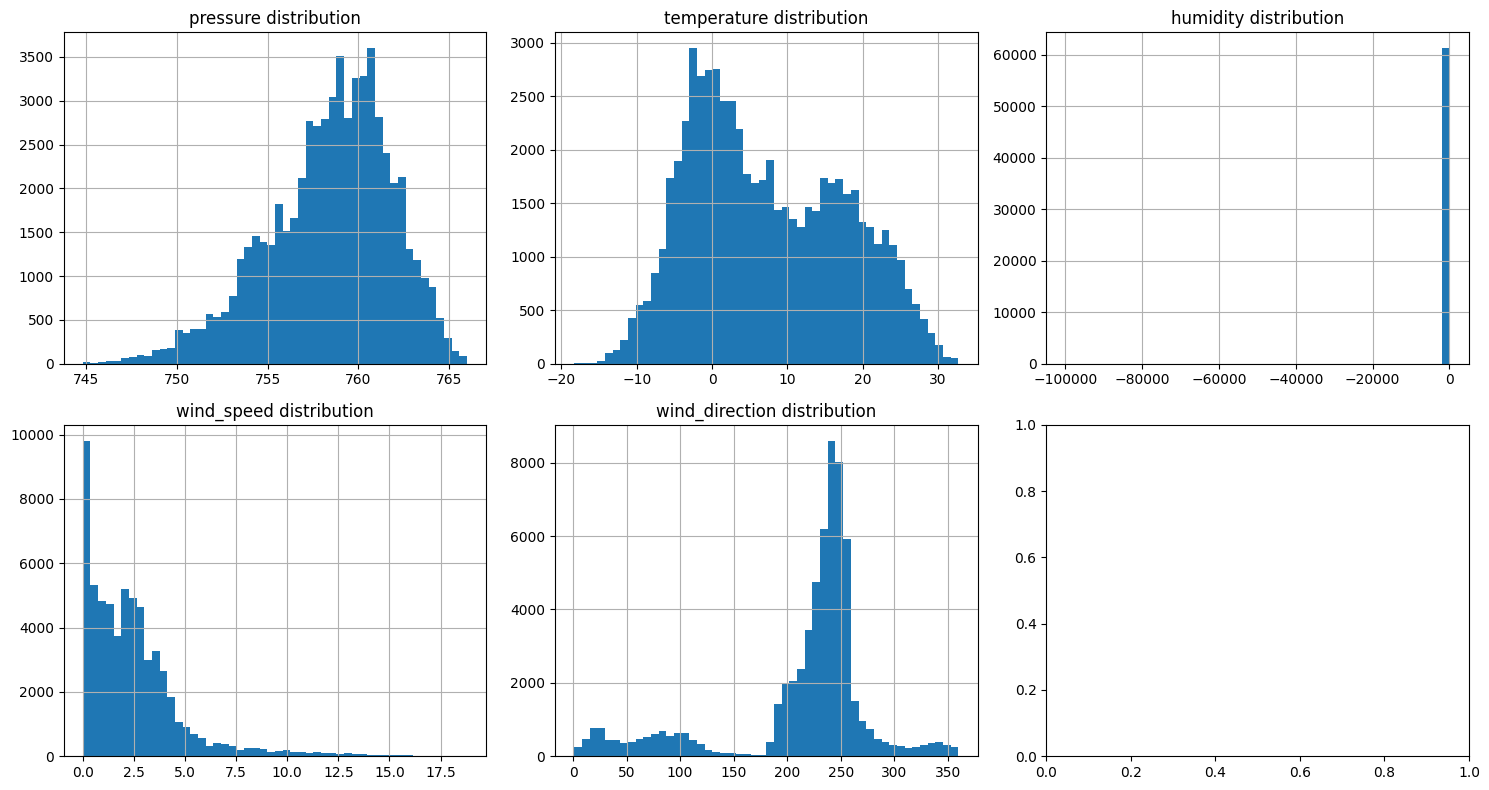


Percentage of zero wind speed readings: 6.87%
Wind direction = 0: 0 times
Wind direction = 360: 36 times


In [27]:
import matplotlib.pyplot as plt

# 1. Basic statistics and distributions
print("Basic statistics:")
print(dirty_df.describe())

# 2. Check lag-1 autocorrelation (should be high for weather data)
print("\nLag-1 autocorrelation (should be >0.8 for temp/pressure/humidity):")
autocorr = dirty_df[['pressure', 'temperature', 'humidity', 'wind_speed']].apply(lambda x: x.autocorr(lag=1))
print(autocorr)

# 3. Plot histograms to spot anomalies
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
cols = ['pressure', 'temperature', 'humidity', 'wind_speed', 'wind_direction']
for i, col in enumerate(cols):
    ax = axes[i//3, i%3]
    dirty_df[col].hist(bins=50, ax=ax)
    ax.set_title(f'{col} distribution')
plt.tight_layout()
plt.show()

# 4. Check for excessive zero wind speed (calm periods are normal, but 100% zeros = sensor issue)
zero_wind_pct = (dirty_df['wind_speed'] == 0).mean() * 100
print(f"\nPercentage of zero wind speed readings: {zero_wind_pct:.2f}%")

# 5. Wind direction: should be roughly uniform or bimodal (prevailing directions)
# Check if too many 0s or 360s (possible default/fill value)
wind_dir_zeros = (dirty_df['wind_direction'] == 0).sum()
wind_dir_360 = (dirty_df['wind_direction'] == 360).sum()
print(f"Wind direction = 0: {wind_dir_zeros} times")
print(f"Wind direction = 360: {wind_dir_360} times")

In [28]:
# Clean humidity: cap at 0–100 and remove extreme outliers
# dirty_df['humidity'] = dirty_df['humidity'].clip(lower=0, upper=100)
# OR, if you know the error code:
dirty_df['humidity'] = dirty_df['humidity'].replace(-99999, 100)

In [29]:
dirty_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pressure,61353.0,758.410032,3.428301,744.8,756.3,758.8,760.9,766.0
temperature,61353.0,7.270710,10.150196,-18.3,-1.0,5.6,15.7,32.7
humidity,61353.0,53.557870,24.509140,7.0,35.0,49.0,69.0,100.0
wind_direction,61353.0,214.778985,69.616308,1.0,210.0,236.0,250.0,360.0
wind_speed,61353.0,2.484533,2.446459,0.0,0.8,2.0,3.3,18.8


In [33]:
import numpy as np

# 1. Convert Meteorological Degrees to Radians for Math
# Formula: (270 - degrees) aligns Meteo North (0) to Math North (90)
wd_rad = np.deg2rad(270 - dirty_df['wind_direction'])

# 2. Calculate U and V
# U = East-West component, V = North-South component
dirty_df['u'] = dirty_df['wind_speed'] * np.cos(wd_rad)
dirty_df['v'] = dirty_df['wind_speed'] * np.sin(wd_rad)

In [34]:
# ===========================
# 6. HOURLY MEAN RESAMPLING
# ===========================
hourly_df = (
    dirty_df
    .resample('H')          # 1-hour bins
    .mean()                  # mean of all 10-min points in the hour
    .dropna()                # discard hours with no observations
)

print("Hourly shape :", hourly_df.shape)
print("First 5 rows :")
display(hourly_df.head())

# optional: verify regular spacing
print("\nInterval check (should all be 1H) :")
print(hourly_df.index.to_series().diff().value_counts().head())

Hourly shape : (10329, 7)
First 5 rows :


/tmp/ipykernel_23290/771612931.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample('H')          # 1-hour bins


,pressure,temperature,humidity,wind_direction,wind_speed,u,v
datetime,,,,,,,
2024-01-01 00:00:00,758.466667,-1.016667,62.166667,137.000000,0.100000,-0.022693,-0.047340
2024-01-01 01:00:00,758.383333,-1.533333,64.000000,207.166667,0.283333,-0.113825,0.011167
2024-01-01 02:00:00,758.383333,-1.150000,61.333333,63.000000,0.200000,-0.169286,-0.061781
2024-01-01 03:00:00,758.783333,-1.166667,58.666667,181.166667,0.500000,0.142045,-0.397690
2024-01-01 04:00:00,759.000000,-1.483333,62.166667,109.666667,0.966667,-0.512590,-0.609574



Interval check (should all be 1H) :
datetime
0 days 01:00:00    10318
0 days 02:00:00        3
0 days 03:00:00        2
1 days 16:00:00        1
0 days 05:00:00        1
Name: count, dtype: int64


In [35]:
# 1. Basic statistics for u and v
print("u (zonal) component stats:")
print(hourly_df['u'].describe())
print("\nv (meridional) component stats:")
print(hourly_df['v'].describe())

# 2. Identify extreme outliers using IQR (Interquartile Range)
def detect_outliers_iqr(series, factor=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers, lower_bound, upper_bound

u_outliers, u_low, u_high = detect_outliers_iqr(hourly_df['u'], factor=3.0)  # 3.0 for extreme outliers
v_outliers, v_low, v_high = detect_outliers_iqr(hourly_df['v'], factor=3.0)

print(f"\nExtreme u outliers (using 3*IQR): {u_outliers.sum()}")
print(f"u range: [{u_low:.3f}, {u_high:.3f}]")
print(f"Extreme v outliers (using 3*IQR): {v_outliers.sum()}")
print(f"v range: [{v_low:.3f}, {v_high:.3f}]")

# 3. Cross-check with original wind speed (u and v must satisfy: sqrt(u² + v²) ≈ wind_speed)
hourly_df['wind_speed_reconstructed'] = np.sqrt(hourly_df['u']**2 + hourly_df['v']**2)
diff = (hourly_df['wind_speed_reconstructed'] - hourly_df['wind_speed']).abs()
max_diff = diff.max()
print(f"\nMax difference between original and reconstructed wind speed: {max_diff:.6f} m/s")
print("→ Should be near zero (numerical precision only).")

# 4. Optional: flag any hour where |u| or |v| > 25 m/s (physically extreme)
extreme_u = (hourly_df['u'].abs() > 25).sum()
extreme_v = (hourly_df['v'].abs() > 25).sum()
print(f"\nHours with |u| > 25 m/s: {extreme_u}")
print(f"Hours with |v| > 25 m/s: {extreme_v}")

u (zonal) component stats:
count    10329.000000
mean         1.264771
std          1.921385
min         -9.316078
25%          0.226994
50%          1.163868
75%          2.447031
max          9.809403
Name: u, dtype: float64

v (meridional) component stats:
count    10329.000000
mean         0.688983
std          2.418622
min        -16.856723
25%          0.108100
50%          0.654374
75%          1.449376
max         15.924930
Name: v, dtype: float64

Extreme u outliers (using 3*IQR): 24
u range: [-6.433, 9.107]
Extreme v outliers (using 3*IQR): 604
v range: [-3.916, 5.473]

Max difference between original and reconstructed wind speed: 3.677354 m/s
→ Should be near zero (numerical precision only).

Hours with |u| > 25 m/s: 0
Hours with |v| > 25 m/s: 0


In [ ]:
hourly_df.info()

In [ ]:
hourly_df.isna().sum()

/tmp/ipykernel_23290/1670729989.py:20: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_30d = hourly_df.last('30D')


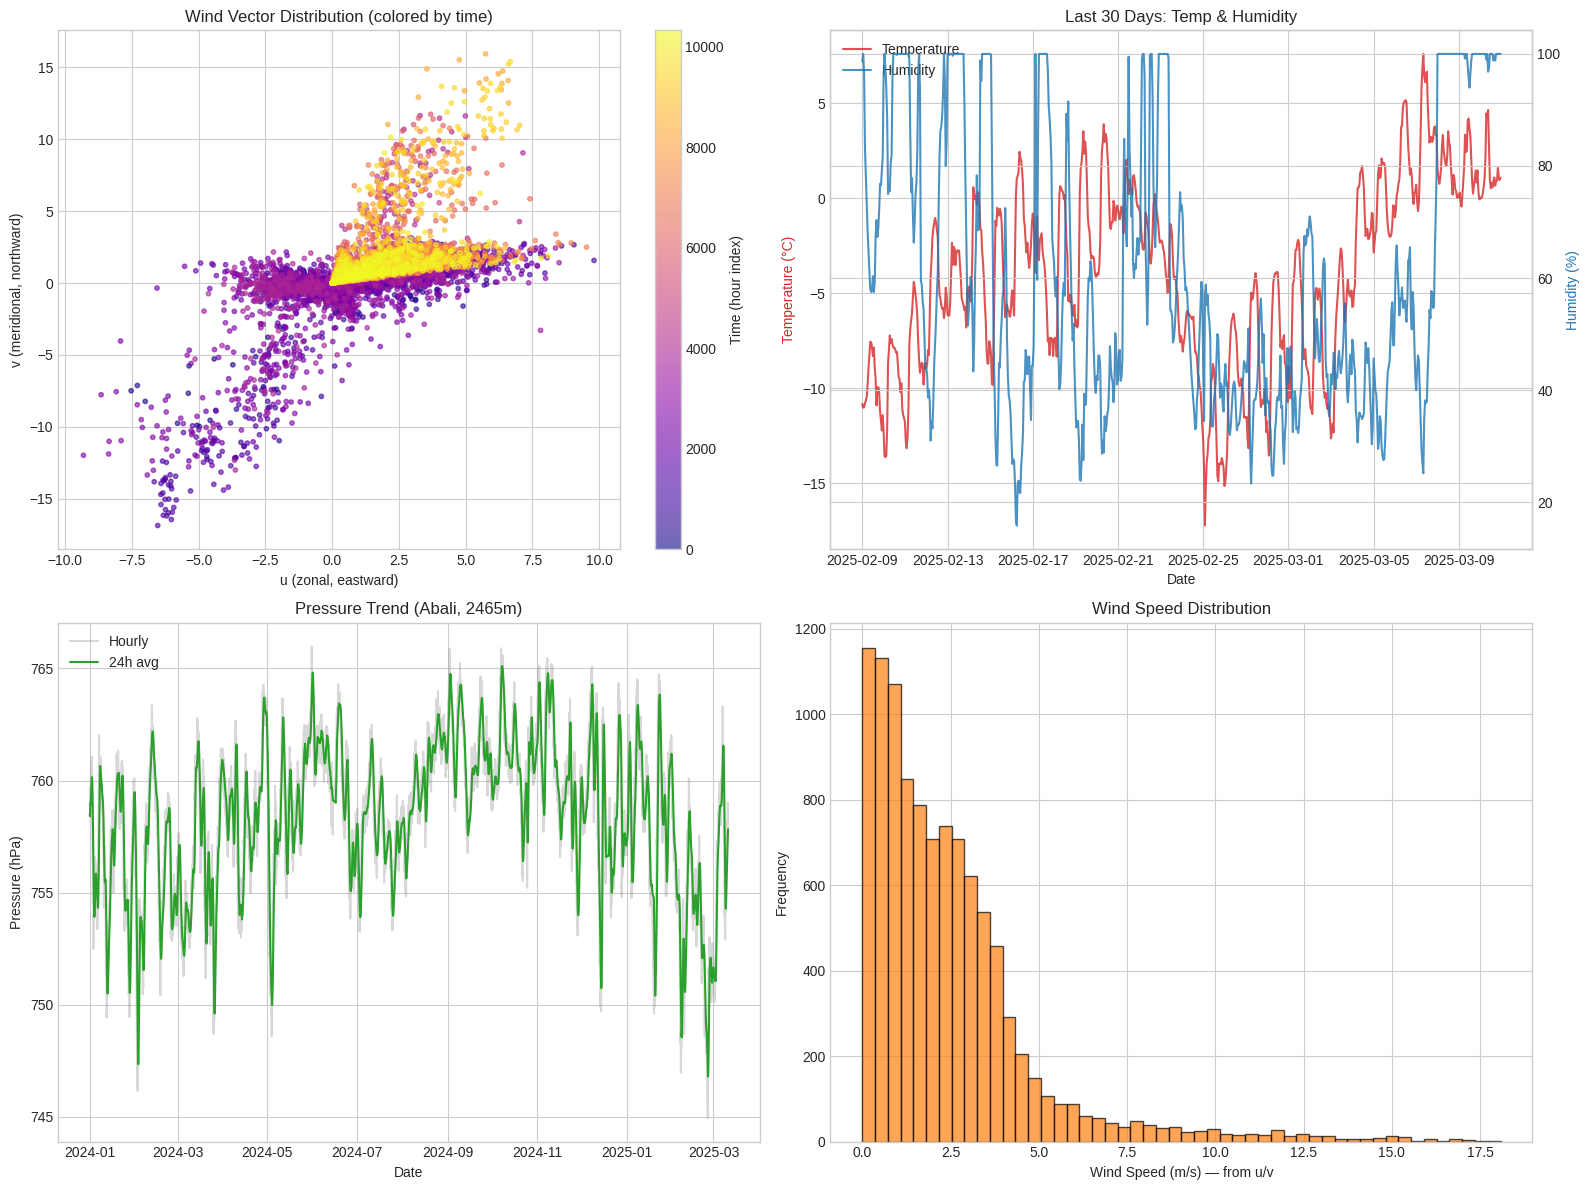

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("tab10")

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Wind vectors over time (u vs v scatter + time color)
sc = axes[0, 0].scatter(hourly_df['u'], hourly_df['v'], 
                        c=range(len(hourly_df)), cmap='plasma', alpha=0.6, s=10)
axes[0, 0].set_xlabel('u (zonal, eastward)')
axes[0, 0].set_ylabel('v (meridional, northward)')
axes[0, 0].set_title('Wind Vector Distribution (colored by time)')
plt.colorbar(sc, ax=axes[0, 0], label='Time (hour index)')

# 2. Temperature and humidity over time (last 30 days example)
last_30d = hourly_df.last('30D')
ax2 = axes[0, 1].twinx()
ln1 = axes[0, 1].plot(last_30d.index, last_30d['temperature'], 
                      color='tab:red', label='Temperature', alpha=0.8)
ln2 = ax2.plot(last_30d.index, last_30d['humidity'], 
               color='tab:blue', label='Humidity', alpha=0.8)
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Temperature (°C)', color='tab:red')
ax2.set_ylabel('Humidity (%)', color='tab:blue')
axes[0, 1].set_title('Last 30 Days: Temp & Humidity')
lines = ln1 + ln2
labels = [l.get_label() for l in lines]
axes[0, 1].legend(lines, labels, loc='upper left')

# 3. Pressure trend (with 24h rolling mean)
hourly_df['pressure_24h'] = hourly_df['pressure'].rolling(window=24, min_periods=1).mean()
axes[1, 0].plot(hourly_df.index, hourly_df['pressure'], alpha=0.3, color='gray', label='Hourly')
axes[1, 0].plot(hourly_df.index, hourly_df['pressure_24h'], color='tab:green', label='24h avg')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Pressure (hPa)')
axes[1, 0].set_title('Pressure Trend (Abali, 2465m)')
axes[1, 0].legend()

# 4. Wind speed distribution (from u/v)
wind_speed_from_uv = np.sqrt(hourly_df['u']**2 + hourly_df['v']**2)
axes[1, 1].hist(wind_speed_from_uv, bins=50, color='tab:orange', alpha=0.7, edgecolor='k')
axes[1, 1].set_xlabel('Wind Speed (m/s) — from u/v')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Wind Speed Distribution')

plt.tight_layout()
plt.show()

In [37]:
import os
# ===========================
# 6-d. EXPORT HOURLY CLEAN CSV
# ===========================
out_dir  = '../../data/cleaned/'
hourly_path = os.path.join(out_dir, 'multi_var_wind_hourly_cleaned.csv')
hourly_df.to_csv(hourly_path)

print("✅ multi-variate Hourly clean file saved to:", hourly_path)
print("Shape written:", hourly_df.shape)

✅ multi-variate Hourly clean file saved to: ../../data/cleaned/multi_var_wind_hourly_cleaned.csv
Shape written: (10329, 9)


In [38]:
hourly_df.head()

,pressure,temperature,humidity,wind_direction,wind_speed,u,v,wind_speed_reconstructed,pressure_24h
datetime,,,,,,,,,
2024-01-01 00:00:00,758.466667,-1.016667,62.166667,137.000000,0.100000,-0.022693,-0.047340,0.052498,758.466667
2024-01-01 01:00:00,758.383333,-1.533333,64.000000,207.166667,0.283333,-0.113825,0.011167,0.114371,758.425000
2024-01-01 02:00:00,758.383333,-1.150000,61.333333,63.000000,0.200000,-0.169286,-0.061781,0.180207,758.411111
2024-01-01 03:00:00,758.783333,-1.166667,58.666667,181.166667,0.500000,0.142045,-0.397690,0.422296,758.504167
2024-01-01 04:00:00,759.000000,-1.483333,62.166667,109.666667,0.966667,-0.512590,-0.609574,0.796448,758.603333
